# Data analysis for WeRateDogs

# table of contents

Table of Contents
I. Introduction
II. Data Collection
III. Data Assessment
IV. Data Cleaning
V. Data Analysis & Visualization

# introduction

This project is designed to enhance data wrangling skills using real-world data. The data wrangling process comprises three stages: gathering, assessing, and cleaning. The dataset selected for this project is the tweet archive of the Twitter user @dog_rates, also recognized as WeRateDogs. WeRateDogs is a Twitter account that provides humorous ratings for people's dogs along with amusing comments about each dog. Initially, I will collect data in various formats from diverse sources. Subsequently, I will evaluate the data using both visual and programmatic methods to identify any issues related to data quality and tidiness. Following this assessment, I will conduct programmatic cleaning to rectify all identified issues. Finally, I will analyze the cleaned dataset and present the results visually.

# gathering data

In [4]:
#FILL IN 1st data gathering and loading method
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

# Loading data project

In [8]:
# Read CSV file
twitter_archive = pd.read_csv('twitter_archive_master.csv')
print(twitter_archive)

      Unnamed: 0            tweet_id            timestamp              source  \
0              0  667470559035432960  2015-11-19 22:32:36  Twitter Web Client   
1              1  667491009379606528  2015-11-19 23:53:52  Twitter Web Client   
2              2  667495797102141441  2015-11-20 00:12:54  Twitter Web Client   
3              3  667502640335572993  2015-11-20 00:40:05  Twitter Web Client   
4              4  667509364010450944  2015-11-20 01:06:48  Twitter Web Client   
...          ...                 ...                  ...                 ...   
1653        1779  878776093423087618  2017-06-25 00:45:22  Twitter for iPhone   
1654        1780  867421006826221569  2017-05-24 16:44:18  Twitter for iPhone   
1655        1781  859607811541651456  2017-05-03 03:17:27  Twitter for iPhone   
1656        1782  825026590719483904  2017-01-27 17:04:02  Twitter for iPhone   
1657        1783  803773340896923648  2016-11-30 01:31:12  Twitter for iPhone   

                           

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

# Predict of twitter image

In [7]:
# Download file using Requests library via URL provided 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [9]:
# Save the file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# API of twitter

In [10]:
# Download file using Requests library via URL provided 
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

# Save the file
with open('tweet-json.txt', mode = 'wb') as file:
    file.write(response.content)

In [11]:
# Read downloaded txt file line by line into a pandas DataFrame
df_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        parsed_json = json.loads(line)
        df_list.append({'tweet_id': parsed_json['id'],
                        'retweet_count': parsed_json['retweet_count'],
                        'favorite_count': parsed_json['favorite_count']})
        
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assess data



I will examine the data using both visual and programmatic methods to detect potential issues related to data quality, including content problems, and structural issues concerning tidiness.

Data quality dimensions:

Completeness /
Validity /
Accuracy /
Consistency /
Tidy data requirements:

Each variable should constitute a column.
Each observation should constitute a row.
Each type of observational unit should constitute a table.







# Twitter table

In [12]:
twitter_archive


,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,confident_level
0,0,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11.0,10,a,None,102,273,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,Toy_poodle,0.304175
1,1,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7.0,10,None,None,242,559,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,Borzoi,0.852088
2,2,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9.0,10,Philippe,None,294,565,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957
3,3,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11.0,10,Hall,None,231,563,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,Labrador_retriever,0.996709
4,4,667509364010450944,2015-11-20 01:06:48,Twitter Web Client,This a Norwegian Pewterschmidt named Tickles. ...,https://twitter.com/dog_rates/status/667509364...,12.0,10,None,None,2272,7148,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,Beagle,0.636169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,1779,878776093423087618,2017-06-25 00:45:22,Twitter for iPhone,This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13.0,10,Snoopy,puppo,4319,19763,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,Italian_greyhound,0.734684
1654,1780,867421006826221569,2017-05-24 16:44:18,Twitter for iPhone,This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,12.0,10,Shikha,puppo,2697,16755,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,Eskimo_dog,0.616457
1655,1781,859607811541651456,2017-05-03 03:17:27,Twitter for iPhone,Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13.0,10,None,puppo,1704,19476,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,Golden_retriever,0.895529
1656,1782,825026590719483904,2017-01-27 17:04:02,Twitter for iPhone,Say hello to Pablo. He's one gorgeous puppo. A...,https://www.gofundme.com/my-puppys-double-cata...,12.0,10,Pablo,puppo,1483,7020,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,Eskimo_dog,0.524454


In [13]:
twitter_archive.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1658 non-null   int64  
 1   tweet_id            1658 non-null   int64  
 2   timestamp           1658 non-null   object 
 3   source              1658 non-null   object 
 4   text                1658 non-null   object 
 5   expanded_urls       1658 non-null   object 
 6   rating_numerator    1658 non-null   float64
 7   rating_denominator  1658 non-null   int64  
 8   name                1658 non-null   object 
 9   dog_stage           1658 non-null   object 
 10  retweet_count       1658 non-null   int64  
 11  favorite_count      1658 non-null   int64  
 12  jpg_url             1658 non-null   object 
 13  breed               1658 non-null   object 
 14  confident_level     1658 non-null   float64
dtypes: float64(2), int64(5), object(8)
memory usage: 194.4+

In [14]:
twitter_archive.describe()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,confident_level
count,1658.000000,1.658000e+03,1658.000000,1658.0,1658.000000,1658.000000,1658.000000
mean,886.033172,7.397171e+17,10.868384,10.0,2841.998794,9318.565139,0.553127
std,512.393284,6.806603e+16,1.683681,0.0,4842.086769,12663.747772,0.298658
min,0.000000,6.660209e+17,2.000000,10.0,16.000000,81.000000,0.000010
25%,451.500000,6.775853e+17,10.000000,10.0,652.250000,2181.250000,0.308122
50%,882.500000,7.142549e+17,11.000000,10.0,1441.500000,4491.000000,0.554116
75%,1324.750000,7.932223e+17,12.000000,10.0,3265.750000,11773.750000,0.823575
max,1783.000000,8.921774e+17,14.000000,10.0,79515.000000,132810.000000,0.999956


In [15]:
twitter_archive.duplicated().sum()

0

In [16]:

twitter_archive.tweet_id.duplicated().sum()

0

In [17]:
twitter_archive.rating_numerator.value_counts()

12.00    424
10.00    361
11.00    359
13.00    222
9.00     133
8.00      68
7.00      31
14.00     22
6.00      16
5.00      13
2.00       2
3.00       2
13.50      1
11.26      1
9.75       1
4.00       1
11.27      1
Name: rating_numerator, dtype: int64

In [18]:
twitter_archive.rating_denominator.value_counts()

10    1658
Name: rating_denominator, dtype: int64

In [22]:
twitter_archive.source.value_counts()

Twitter for iPhone    1627
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64


Notes:

Convert data types of in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id from float to int.

Retain only original ratings with pictures; remove entries related to retweets and replies, along with their corresponding columns. Address the picture part later.

Convert the data type of timestamp from str to datetime and remove the "+0000" in the timestamp.

Consolidate the dog stages (doggo, floofer, pupper, puppo) into a single column.

Address abnormal values in rating_denominator (e.g., 170, 150, 130), noting that the denominator is typically 10.

Address abnormal values in rating_numerator (e.g., 1776, 960, 666, 204, 165), which seem nonsensical.

Eliminate redundant information in the source column to enhance readability.

# prediction table of image


In [24]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [25]:
image_prediction.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
image_prediction.jpg_url.duplicated().sum()

66

In [29]:
image_prediction.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [27]:
image_prediction.tweet_id.duplicated().sum()

0

In [30]:
image_prediction.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [31]:
image_prediction.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64


Observations:

Inconsistent capitalization in the p1, p2, and p3 columns. /

Duplicate entries in the jpg_url. /

Several entries do not represent dogs, such as "jaguar," "mailbox," "peacock," "cloak," etc. /

Certain details should be incorporated into the twitter_archive table. /

For this analysis, only the most confident prediction for the dog breed is necessary.







# tweet_json table


In [32]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [33]:
tweet_json.duplicated().sum()


0

In [34]:
tweet_json.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


Observations:

This information should be included in the twitter_archive table.

The absence of data is likely attributed to retweets in the twitter_archive.









# Observation Summary:


Quality:

twitter_archive table:

1- Convert data types of in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id from float to str.

2- Retain only original ratings with pictures; remove entries related to retweets and replies, along with their corresponding columns. Address the picture part later.

3- Convert the data type of timestamp from str to datetime and remove the "+0000" in the timestamp.

4- Address abnormal values in rating_denominator (e.g., 170, 150, 130), noting that the denominator is typically 10.

5- Address abnormal values in rating_numerator (e.g., 1776, 960, 666, 204, 165), which seem nonsensical.

6- Eliminate redundant information in the source column to enhance readability.

image_prediction table:
7. Resolve inconsistent capitalization in the p1, p2, and p3 columns.

8- Remove duplicate entries in the jpg_url.

9- Identify and handle entries that do not represent dogs, such as "jaguar," "mailbox," "peacock," "cloak," etc.

10- For this analysis, retain only the most confident prediction for the dog breed.

tweet_json table:
11. Address missing data, potentially due to retweets in the twitter_archive.

Tidiness:

twitter_archive:
12. Consolidate the stages of the dog (doggo, floofer, pupper, puppo) into a single column.

Combine the three tables into one since they all pertain to the same type of observational unit, adhering to tidy data requirements.

# IV.Cleaning Data

The process of programmatic data cleaning involves the following steps:

1- Define: Translate our assessments into clear and defined cleaning tasks.

2- Code: Convert these defined tasks into code and execute the code to perform the cleaning operations.

3- Test: Verify the dataset, either visually or using code, to ensure that the cleaning operations were successful.

In [35]:
# Make copys for all the data
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

# quality issue

# 1- twitter_archive: The data type for the timestamp should be datetime, and we need to remove the +0000.



Define: Remove +0000 and use pd.to_datetime to convert the timestamp from str to datetime.

In [49]:
# Convert timestamp to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'], format='%Y-%m-%d %H:%M:%S')
# Convert to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)


In [50]:
twitter_archive_clean.timestamp.head()


0   2015-11-19 22:00:00
1   2015-11-19 23:00:00
2   2015-11-20 00:00:00
3   2015-11-20 00:00:00
4   2015-11-20 01:00:00
Name: timestamp, dtype: datetime64[ns]

# 2- twitter_archive: The source information is redundant, and we aim to replace the long URL with different category names.


Define: Utilize the replace function to substitute the URL with short category names.


In [51]:
twitter_archive_clean.source.value_counts()


Twitter for iPhone    1627
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

In [56]:
twitter_archive_clean.source = twitter_archive_clean.source.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
                                                                     '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
                                                                     '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
                                                                     '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'})


In [57]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1627
Twitter Web Client      22
TweetDeck                9
Name: source, dtype: int64

# 3- image_prediction: Eliminate entries that do not represent dogs, aligning with the approach taken in the twitter_archive and tweet_json tables. Removing such entries will likely simplify the resolution of abnormal rating issues in rating_denominator and rating_numerator.

Define
use isin and ~ to filter and delete rows that are False in p1_dog, p2_dog, p3_dog column in all three dataframes.

Code

In [58]:
# Number of rows before data cleaning
print(image_prediction_clean.shape)
print(twitter_archive_clean.shape)
print(tweet_json_clean.shape)

(2075, 12)
(1658, 15)
(2354, 3)


In [59]:
# Filter posts that are not dogs and put those tweet_id into a drop_list
image_prediction_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id
drop_list = image_prediction_clean.query('p1_dog == False and p2_dog == False and p3_dog == False').tweet_id

# Drop the rows with tweet_id in the drop_list in all dataframes
image_prediction_clean = image_prediction_clean[~image_prediction_clean.tweet_id.isin(drop_list)]
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(drop_list)]
tweet_json_clean = tweet_json_clean[~tweet_json_clean.tweet_id.isin(drop_list)]

In [60]:
# Number of rows after data cleaning
print(image_prediction_clean.shape)
print(twitter_archive_clean.shape)
print(tweet_json_clean.shape)

(1751, 12)
(1658, 15)
(2031, 3)


# 4- twitter_archive: abnormal values in rating_denominator. According to the project overview, the ratings almost always have a denominator of 10. Many abnormal rating values were gone after removing ratings not for dogs, making it easier to fix abnormal rating. After investigating further, I found that tweets with denominator not equal to 10 are usually multiple dogs.

Define
Create new dataframe with tweet_id, text, rating_numerator, rating_denominator columns. Filter rating_denominator not equal to 10 and check the text to correct these ratings.

Code

In [61]:
# Create new dataframe with selected columns
df_abnormal_rating = twitter_archive_clean[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

# Filter rating_denominator not equal to 10
df_abnormal_denominator = df_abnormal_rating.query('rating_denominator != 10')

# Display full text
pd.set_option('display.max_colwidth', -1)

df_abnormal_denominator


/tmp/ipykernel_14/3876868124.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,tweet_id,text,rating_numerator,rating_denominator


In [62]:
# Correct ratings by reading through the text, most of the abnormal ratings are associated with multiple dogs.
# tweet_id: 666287406224695296
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10
# tweet_id: 697463031882764288 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 697463031882764288, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 697463031882764288, 'rating_denominator'] = 10
# tweet_id: 684222868335505415 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 684222868335505415, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 684222868335505415, 'rating_denominator'] = 10
# tweet_id: 682962037429899265 
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, 'rating_denominator'] = 10
# tweet_id: 710658690886586372 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 710658690886586372, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 710658690886586372, 'rating_denominator'] = 10
# tweet_id: 713900603437621249 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 713900603437621249, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 713900603437621249, 'rating_denominator'] = 10
# tweet_id: 709198395643068416 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 709198395643068416, 'rating_numerator'] = 9
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 709198395643068416, 'rating_denominator'] = 10
# tweet_id: 722974582966214656 
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, 'rating_numerator'] = 13
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, 'rating_denominator'] = 10
# tweet_id: 716439118184652801
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, 'rating_denominator'] = 10
# tweet_id: 704054845121142784 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 704054845121142784, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 704054845121142784, 'rating_denominator'] = 10
# tweet_id: 677716515794329600 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 677716515794329600, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 677716515794329600, 'rating_denominator'] = 10
# tweet_id: 675853064436391936 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 675853064436391936, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 675853064436391936, 'rating_denominator'] = 10
# tweet_id: 810984652412424192  no rating
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 810984652412424192, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 810984652412424192, 'rating_denominator'] = 10
# tweet_id: 820690176645140481 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 820690176645140481, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 820690176645140481, 'rating_denominator'] = 10
# tweet_id: 731156023742988288 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 731156023742988288, 'rating_numerator'] = 12
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 731156023742988288, 'rating_denominator'] = 10
# tweet_id: 758467244762497024 --- Multiple dogs
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 758467244762497024, 'rating_numerator'] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 758467244762497024, 'rating_denominator'] = 10
# tweet_id: 740373189193256964
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10

In [63]:
twitter_archive_clean.rating_denominator.value_counts()

10    1658
Name: rating_denominator, dtype: int64

# 5- twitter_archive: Address abnormal values in rating_numerator. The removal of ratings not pertaining to dogs has resulted in the elimination of many abnormal rating values.


Define
Use value_counts to see abnormal values and check the text to correct the ratings.
Use isin and ~ to remove entires that are not dogs
Code

In [64]:
twitter_archive_clean.rating_numerator.value_counts()

12.00    424
10.00    361
11.00    359
13.00    222
9.00     133
8.00     68 
7.00     31 
14.00    22 
6.00     16 
5.00     13 
2.00     2  
3.00     2  
13.50    1  
11.26    1  
9.75     1  
4.00     1  
11.27    1  
Name: rating_numerator, dtype: int64

In [65]:
# rating_numerator 75, 26, 27, 0
df_abnormal_rating.query('rating_numerator == 75 or rating_numerator == 26 or rating_numerator == 27 or rating_numerator == 0')


,tweet_id,text,rating_numerator,rating_denominator


In [66]:
# Correct the ratings
# tweet_id: 786709082849828864, rating _numberator should be 9.75 according to the text
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 786709082849828864, 'rating_numerator'] = 9.75
# tweet_id: 680494726643068929, rating _numberator should be 11.26 according to the text
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26
# tweet_id: 778027034220126208, rating _numberator should be 11.27 according to the text
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27
# tweet_id: 835152434251116546
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 835152434251116546, 'rating_numerator'] = 11
# tweet_id: 883482846933004288
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 883482846933004288, 'rating_numerator'] = 13.5

In [67]:
# rating_numerator 3 and 4
df_abnormal_rating.query('rating_numerator == 3 or rating_numerator == 4')

,tweet_id,text,rating_numerator,rating_denominator
456,711306686208872448,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,3.0,10
629,668989615043424256,This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh https://t.co/1zBp1moFlX,3.0,10
1137,747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,4.0,10


rating_numerator = 3, not dog, delete

777885040357281792:
718246886998687744:
673906403526995968:
rating_numerator = 4, not dog, delete

707420581654872064
680940246314430465
671122204919246848
667176164155375616
666649482315059201

In [68]:
# Remove entries that are not dogs
id_list = [777885040357281792, 718246886998687744, 673906403526995968, 707420581654872064, 680940246314430465, 671122204919246848, 667176164155375616, 666649482315059201]
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(id_list)]

In [69]:
twitter_archive_clean.rating_numerator.value_counts()

12.00    424
10.00    361
11.00    359
13.00    222
9.00     133
8.00     68 
7.00     31 
14.00    22 
6.00     16 
5.00     13 
2.00     2  
3.00     2  
13.50    1  
11.26    1  
9.75     1  
4.00     1  
11.27    1  
Name: rating_numerator, dtype: int64

# 6- image_prediction: For our analysis, we only require the most confident prediction from the image predictions.








Define
Create two columns breed, confident_level
Create a function to look through the preditions and find the most confident prediction that is a dog breed. p1 is the most confident prediction, followed by p2 and p3
Remove other columns not needed.

In [70]:
# Create a breed column and a confident_level column
breed = []
confident_level = []

# Create a function to find the most confident prediction that is a dog breed
# p1 is the most confident prediction, followed by p2 and p3
def image_pred(image_prediction_clean):
    if image_prediction_clean.p1_dog == True:
        breed.append(image_prediction_clean.p1)
        confident_level.append(image_prediction_clean.p1_conf)
    elif image_prediction_clean.p2_dog == True:
        breed.append(image_prediction_clean.p2)
        confident_level.append(image_prediction_clean.p2_conf)
    elif image_prediction_clean.p3_dog == True:
        breed.append(image_prediction_clean.p3)
        confident_level.append(image_prediction_clean.p3_conf)
    else:
        breed.append('Unknown_breed')
        confident_level.append(0)
        
# Apply the function by column        
image_prediction_clean.apply(image_pred, axis=1)

# Add the breed and confident_level column to image_prediction_clean 
image_prediction_clean['breed'] = breed
image_prediction_clean['confident_level'] = confident_level

# Drop columns no longer needed
image_prediction_clean = image_prediction_clean.drop(['img_num',
                                                      'p1','p1_conf','p1_dog',
                                                      'p2','p2_conf','p2_dog',
                                                      'p3','p3_conf','p3_dog'],axis=1)

In [71]:
image_prediction_clean.head()

,tweet_id,jpg_url,breed,confident_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


# 7- image_prediction: inconsistent capitalization in p1 column

Define
Use str.capitalize to capitalize the first letter

Code

In [72]:
image_prediction_clean.breed = image_prediction_clean.breed.str.capitalize()

In [73]:
image_prediction_clean.head(10)

,tweet_id,jpg_url,breed,confident_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,Chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,Golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,Miniature_poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,Golden_retriever,0.775930


### Tidiness Issue 1:

# 1. twitter_archive: The dog stages (doggo, floofer, pupper, puppo) should be combined into a single column.








Define
Use pd.melt to melt the doggo, floofer, pupper and puppo columns to a type and dog_stage column. Drop the intermediate column.

Code

In [76]:
# Check if the columns exist before melting
if all(col in twitter_archive_clean.columns for col in ['doggo', 'floofer', 'pupper', 'puppo']):
    # Melt the dog stages columns
    twitter_archive_clean = pd.melt(twitter_archive_clean, 
                                    id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                                    value_vars=['doggo', 'floofer', 'pupper', 'puppo'], 
                                    var_name='type', 
                                    value_name='dog_stage')

    # Drop the 'type' column
    twitter_archive_clean.drop('type', axis=1, inplace=True)

    # Sort by dog_stage and drop duplicates
    twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')
else:
    print("One or more dog stages columns are missing.")


One or more dog stages columns are missing.


In [77]:
twitter_archive_clean.dog_stage.value_counts()

None       1401
pupper     173 
doggo      54  
puppo      22  
floofer    8   
Name: dog_stage, dtype: int64

# 2. tweet_json: Merge the tweet_json data into the twitter_archive table.

Define
Merge the retweet_count, favorite_count column to the twitter_archive table, joining on tweet_id .

Code

In [78]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean,
                            on = ['tweet_id'], how = 'left')

In [79]:
twitter_archive_clean.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count_x,favorite_count_x,jpg_url,breed,confident_level,retweet_count_y,favorite_count_y
0,0,667470559035432960,2015-11-19 22:00:00,Twitter Web Client,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11.0,10,a,None,102,273,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,Toy_poodle,0.304175,102,273
1,1,667491009379606528,2015-11-19 23:00:00,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,7.0,10,None,None,242,559,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,Borzoi,0.852088,242,559
2,2,667495797102141441,2015-11-20 00:00:00,Twitter Web Client,This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9.0,10,Philippe,None,294,565,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957,294,565
3,3,667502640335572993,2015-11-20 00:00:00,Twitter Web Client,Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,https://twitter.com/dog_rates/status/667502640335572993/photo/1,11.0,10,Hall,None,231,563,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,Labrador_retriever,0.996709,231,563
4,4,667509364010450944,2015-11-20 01:00:00,Twitter Web Client,This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,https://twitter.com/dog_rates/status/667509364010450944/photo/1,12.0,10,None,None,2272,7148,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,Beagle,0.636169,2272,7148


# 3. image_prediction: Integrate the image_prediction data into the twitter_archive table. Given our focus on original ratings with images, retain only those rows that have associated images.








In [83]:
# Merge tables
twitter_archive_clean = pd.merge(twitter_archive_clean, image_prediction_clean,
                                 on='tweet_id', how='left')

# Display the number of null values before cleaning
null_values_before_cleaning = twitter_archive_clean['jpg_url'].isna().sum()
print(f"Number of null values in 'jpg_url' before cleaning: {null_values_before_cleaning}")


Number of null values in 'jpg_url' before cleaning: 0


In [84]:
twitter_archive_clean = (twitter_archive_clean[twitter_archive_clean.jpg_url.notnull()])

In [85]:
# number of null values after cleaning
twitter_archive_clean.jpg_url.isnull().sum()

0

In [86]:
# View the dataframe
twitter_archive_clean.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,confident_level_y,jpg_url_x,breed_x,confident_level_x,jpg_url_y,breed_y,confident_level_y,jpg_url,breed,confident_level
0,0,667470559035432960,2015-11-19 22:00:00,Twitter Web Client,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11.0,10,a,None,...,0.304175,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,Toy_poodle,0.304175,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,Toy_poodle,0.304175,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,Toy_poodle,0.304175
1,1,667491009379606528,2015-11-19 23:00:00,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,https://twitter.com/dog_rates/status/667491009379606528/photo/1,7.0,10,None,None,...,0.852088,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,Borzoi,0.852088,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,Borzoi,0.852088,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,Borzoi,0.852088
2,2,667495797102141441,2015-11-20 00:00:00,Twitter Web Client,This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441/photo/1,9.0,10,Philippe,None,...,0.143957,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957
3,3,667502640335572993,2015-11-20 00:00:00,Twitter Web Client,Say hello to Hall and Oates. Oates is winking and Hall is contemplating the artistic entropy of the universe. 11/10s https://t.co/n5Wtb5Hvsl,https://twitter.com/dog_rates/status/667502640335572993/photo/1,11.0,10,Hall,None,...,0.996709,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,Labrador_retriever,0.996709,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,Labrador_retriever,0.996709,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,Labrador_retriever,0.996709
4,4,667509364010450944,2015-11-20 01:00:00,Twitter Web Client,This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,https://twitter.com/dog_rates/status/667509364010450944/photo/1,12.0,10,None,None,...,0.636169,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,Beagle,0.636169,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,Beagle,0.636169,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,Beagle,0.636169


In [88]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 0 to 1657
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          1658 non-null   int64         
 1   tweet_id            1658 non-null   int64         
 2   timestamp           1658 non-null   datetime64[ns]
 3   source              1658 non-null   object        
 4   text                1658 non-null   object        
 5   expanded_urls       1658 non-null   object        
 6   rating_numerator    1658 non-null   float64       
 7   rating_denominator  1658 non-null   int64         
 8   name                1658 non-null   object        
 9   dog_stage           1658 non-null   object        
 10  retweet_count_x     1658 non-null   int64         
 11  favorite_count_x    1658 non-null   int64         
 12  jpg_url_x           1658 non-null   object        
 13  breed_x             1658 non-null   object      

In [100]:
# Store the clean dataframe in a CSV file named twitter_archive_master.csv
twitter_archive_clean.to_csv('twitter_archive_master.csv')

# load data to a dataframe
df = pd.read_csv('twitter_archive_master.csv')
print(df)

      Unnamed: 0.1  Unnamed: 0            tweet_id            timestamp  \
0     0             0           667470559035432960  2015-11-19 22:00:00   
1     1             1           667491009379606528  2015-11-19 23:00:00   
2     2             2           667495797102141441  2015-11-20 00:00:00   
3     3             3           667502640335572993  2015-11-20 00:00:00   
4     4             4           667509364010450944  2015-11-20 01:00:00   
...  ..            ..                          ...                  ...   
1653  1653          1779        878776093423087618  2017-06-25 00:00:00   
1654  1654          1780        867421006826221569  2017-05-24 16:00:00   
1655  1655          1781        859607811541651456  2017-05-03 03:00:00   
1656  1656          1782        825026590719483904  2017-01-27 17:00:00   
1657  1657          1783        803773340896923648  2016-11-30 01:00:00   

                  source  \
0     Twitter Web Client   
1     Twitter Web Client   
2     Twitter W

# V. Analyzing Data & Visualization








# Identify popular dog breeds based on:


- The count of original tweets 
- The total number of retweets 
- The total number of favorites

In [91]:
df.breed.value_counts()


Golden_retriever      156
Labrador_retriever    106
Pembroke              94 
Chihuahua             88 
Pug                   62 
                      .. 
Japanese_spaniel      1  
Standard_schnauzer    1  
Irish_wolfhound       1  
Scotch_terrier        1  
Clumber               1  
Name: breed, Length: 113, dtype: int64

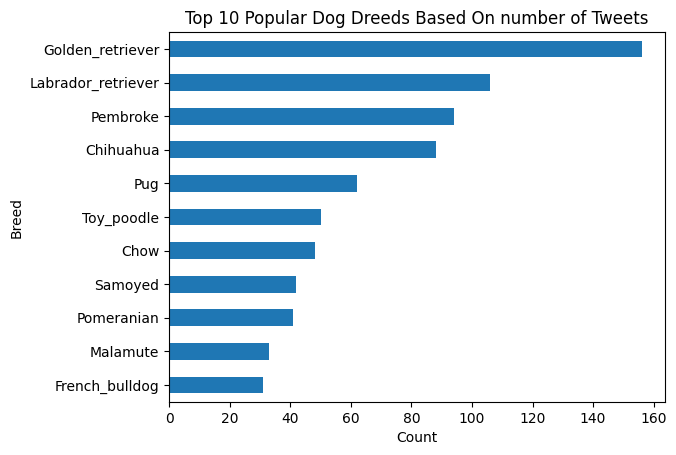

In [92]:
# Plot bar chart for top 10 popular breeds based on number of posts
df.breed.value_counts()[10::-1].plot(kind = 'barh', title = 'Top 10 Popular Dog Dreeds Based On number of Tweets')
plt.xlabel('Count')
plt.ylabel('Breed');


We've cleaned the image_prediction data to keep tweets only for dogs. From the graph, we can clearly see that Golden retriever is the most popular dog breed with 156 tweets. Labrador_retriever is the second popular breed with 106 tweets. The next three breeds are Pembroke (94), Chihuahua (88) and Pug(62) followed by other breeds in descending order. We'll then plot to see popular dog breeds based on number of retweets and favorites.

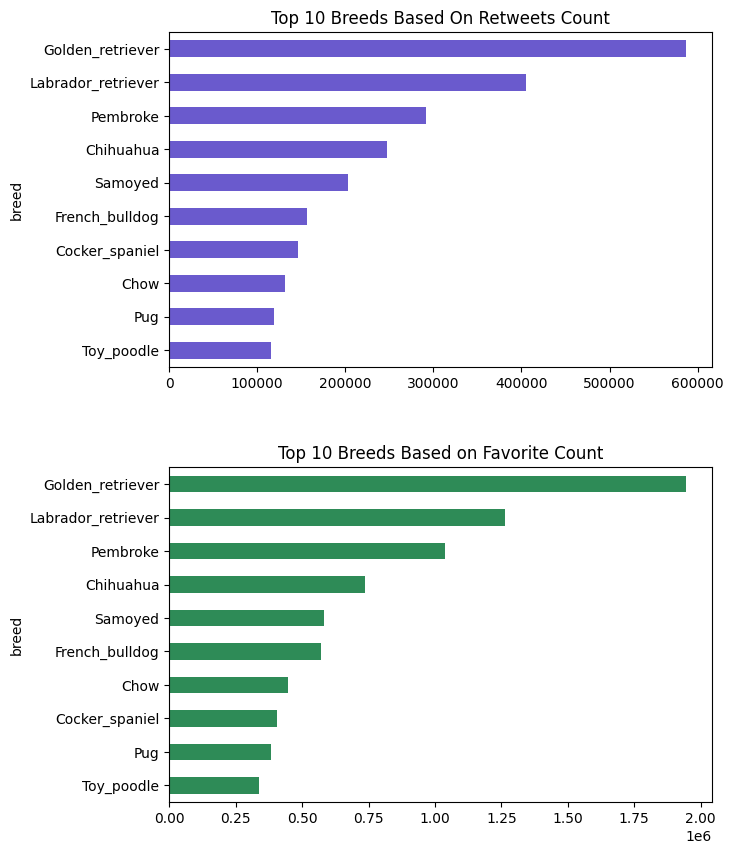

In [107]:
import matplotlib.pyplot as plt

# Specify the correct columns of interest
columns = ['breed', 'retweet_count_x', 'favorite_count_x']

# Check if the specified columns exist in the DataFrame
if all(col in df.columns for col in columns):
    df_breed = df[columns]

    # Group by breed and sum up the retweet and favorite counts
    breed_retweet = df_breed.groupby('breed')['retweet_count_x'].sum().nlargest(10).sort_values()
    breed_favorite = df_breed.groupby('breed')['favorite_count_x'].sum().nlargest(10).sort_values()

    # Plot horizontal bar chart
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 10))

    # Top 10 breeds based on the number of retweets
    breed_retweet.plot.barh(ax=ax1, color='#6A5ACD')
    ax1.set_title("Top 10 Breeds Based On Retweets Count")

    # Top 10 breeds based on the number of favorites
    breed_favorite.plot.barh(ax=ax2, color='#2E8B57')
    ax2.set_title("Top 10 Breeds Based on Favorite Count")

    fig.subplots_adjust(hspace=0.3)

    plt.show()
else:
    print("One or more specified columns are not present in the DataFrame.")


Top 10 popular breeds based on tweet count are: Golden retriever, Labrador retriever, Pembroke, Chihuahua, Pug, Toy poodle, Chow, Samoyed. Pomeranian, Malamute and Chesapeake Bay retriever in descending order. Top 10 breeds based on retweets count are: Golden retriever, Labrador retriever, Pembroke, Chihuahua, Samoyed, French bulldog, Cocker spaniel, Chow, Pug, Toy poodle and Pomeranian. Top 10 breeds based on favorite count are very similar to retweet count(except 5th: French bulldog, 6th : Chow, 7th: Cocker spaniel, 10th: Malamute) probably due to the possible correlation between retweets and favorite since people who retweet are likely to click favorite. The three graphs demonstrate the same pattern that golden retriever, Labrador retriever, Pembroke, and Chihuahua are the top four popular breeds of dogs with Golden retriever being our No.1 popular dog in all standard.

# 2. What is the most common dog stage?

In [108]:
# Dog stage and count
df.dog_stage.value_counts(normalize=True)

None       0.844994
pupper     0.104343
doggo      0.032569
puppo      0.013269
floofer    0.004825
Name: dog_stage, dtype: float64

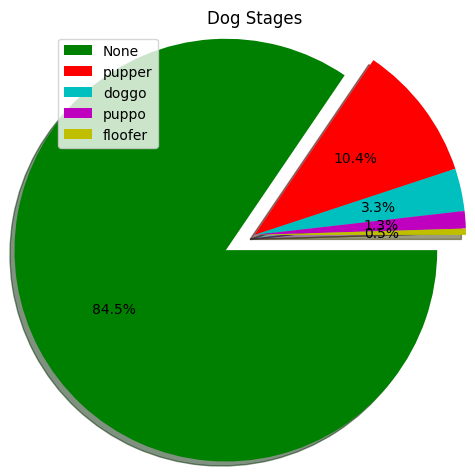

In [109]:
# Plot pie chart
labels = ['None', 'pupper', 'doggo', 'puppo', 'floofer']
values = df.dog_stage.value_counts(normalize=True)
colors = ['g', 'r', 'c' ,'m', 'y']
explode = (0.2, 0, 0, 0, 0)

plt.pie(values, colors=colors, explode=explode, autopct='%1.1f%%', radius = 1.3, shadow=True, counterclock=False)
plt.legend(labels, loc=0)
plt.title('Dog Stages')
plt.tight_layout()

From the pie chart we can see that more than 80% of the tweets do not provide dog stage information in the post. For those have the stage information, pupper is most common stage among all those tweets.

# 3. Rating numerator

Since rating denominator is almost always 10 and we've cleaned the dataset, we'll focus on rating numerator here.

In [110]:
df.rating_numerator.value_counts()

12.00    424
10.00    361
11.00    359
13.00    222
9.00     133
8.00     68 
7.00     31 
14.00    22 
6.00     16 
5.00     13 
2.00     2  
3.00     2  
13.50    1  
11.26    1  
9.75     1  
4.00     1  
11.27    1  
Name: rating_numerator, dtype: int64

In [111]:
df.rating_numerator.describe()

count    1658.000000
mean     10.868384  
std      1.683681   
min      2.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      14.000000  
Name: rating_numerator, dtype: float64

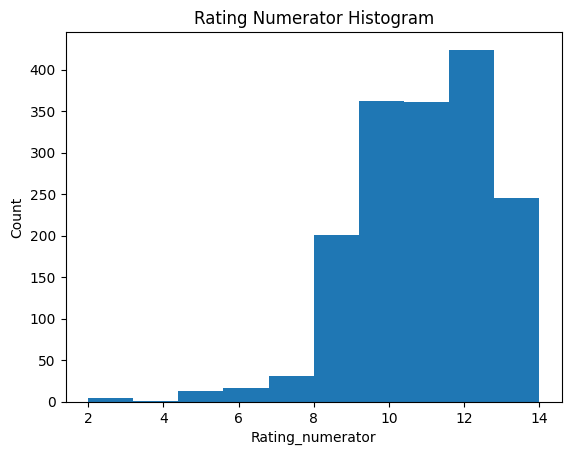

In [112]:
plt.hist(df.rating_numerator)
plt.title('Rating Numerator Histogram')
plt.xlabel('Rating_numerator')
plt.ylabel('Count');

As we can see that the most common ratings are 12 with 424 tweets, 10.00(361 tweets), 11.00(359 tweets), 13(222 tweets), 9.00(133 tweets). The average rating is 10.87.

# 4. Average ratings for popular dog breeds based on tweet count

In [113]:
# Make a list of top popular dog breeds based on number of tweets
top_tweet_count = df.breed.value_counts().sort_values(ascending=False).nlargest(10).rename_axis('dog_breed').reset_index(name='tweet_counts')
breed_list = top_tweet_count.dog_breed.tolist()

# Average rating for top breeds based on number of tweets
avg_rating = df.groupby('breed').rating_numerator.mean().sort_values(ascending=False).rename_axis('breed').reset_index(name='avg_rating')
breed_avg_rating = avg_rating[avg_rating['breed'].isin(breed_list)]

breed_avg_rating

,breed,avg_rating
10,Samoyed,11.690476
11,Golden_retriever,11.612179
15,Pembroke,11.425532
16,Chow,11.416667
28,Labrador_retriever,11.198113
43,Toy_poodle,11.000000
47,Pomeranian,10.945122
51,Malamute,10.878788
61,Chihuahua,10.693182
78,Pug,10.241935


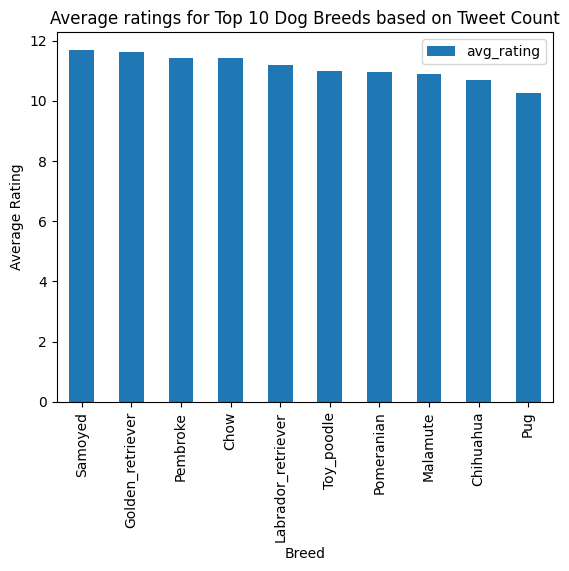

In [114]:
# Plot chart
breed_avg_rating.plot(kind='bar', x='breed', y='avg_rating')  
plt.title('Average ratings for Top 10 Dog Breeds based on Tweet Count')
plt.ylabel("Average Rating")
plt.xlabel("Breed");

# 5. Source

In [115]:
df.source.value_counts()


Twitter for iPhone    1627
Twitter Web Client    22  
TweetDeck             9   
Name: source, dtype: int64

In [116]:
df.source.value_counts(normalize=True)


Twitter for iPhone    0.981303
Twitter Web Client    0.013269
TweetDeck             0.005428
Name: source, dtype: float64

We can see that the majority of users are iphone users(98%).



# References

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.notnull.html
https://stackoverflow.com/questions/45035929/creating-new-pandas-dataframe-from-certain-columns-of-existing-dataframe
https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin
https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/
https://stackoverflow.com/questions/43269548/pandas-how-to-remove-rows-from-a-dataframe-based-on-a-list
https://stackoverflow.com/questions/39922986/pandas-group-by-and-sum
https://www.w3schools.com/tags/ref_colornames.asp
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nlargest.html
https://stackoverflow.com/questions/52436394/how-to-convert-a-pandas-value-counts-into-a-python-list/52436410
https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
https://stackoverflow.com/questions/48258994/how-to-select-two-columns-to-plot-with-dataframe